In [1]:
### import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import  collections
from operator import itemgetter
import random
import os
import seaborn as sns

##### Load the p_campagna positiva

In [2]:
pos_nodes = pd.read_csv('posts_subsets/NODES_Positiva_prating.csv', low_memory=False)
pos_edges = pd.read_csv('posts_subsets/EDGES_Positiva_prating.csv', low_memory=False)
pos_edges
# subset_str = 'pos'

,source,target,weight
0,1,795,2
1,1,796,4
2,1,797,4
3,1,798,2
4,1,83,2
...,...,...,...
1019715,12943,12945,1
1019716,12943,12946,1
1019717,12944,12945,2
1019718,12944,12946,2


#### Load the p_campagna negativa

In [3]:
neg_nodes = pd.read_csv('posts_subsets/NODES_prating_LIWC_neg.csv', low_memory=False)
neg_edges = pd.read_csv('posts_subsets/EDGES_Neg-comp_prating.csv', low_memory=False)
neg_edges
# subset_str = 'neg'

,source,target,weight
0,0,2,3
1,0,3,3
2,0,4,2
3,0,5,3
4,0,6,1
...,...,...,...
1095190,10972,10973,1
1095191,10975,10976,1
1095192,10977,10978,1
1095193,10979,10980,1


In [4]:
pos_nodes.head()

,id,label,counts,counts_problematico,counts_positivo,counts_negativo,counts_ambiguo,polarity
0,0,collegamento,52,0,51,1,0,0.251332
1,1,continuo,66,0,61,5,0,-0.873098
2,2,tempo,167,1,153,13,0,1.000000
3,3,pastorello,1,0,1,0,0,0.000000
4,4,recuperare,12,0,12,0,0,-1.000000


### Create Networkx Graph object
#### pos network

In [5]:
G = nx.from_pandas_edgelist(pos_edges, 'source', 'target', ['weight'])
data = pos_nodes.set_index('id').to_dict('index').items()

In [6]:
G.add_nodes_from(data)

In [7]:
### print graph info pos
##nodes: 12947
## edges: 1019720
### Average degree: 157.5222
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 12947
Number of edges: 1019720
Average degree: 157.5222


In [38]:
### graph info neg
print(nx.info(G))
##Number of nodes: 10984
## Number of edges: 1095195
### Average degree: 199.4164

Name: 
Type: Graph
Number of nodes: 10984
Number of edges: 1095195
Average degree: 199.4164


#### Run some Network statistics

**Low density values show a weakly connected network***

In [8]:
#Overall Density of the network pos
density = nx.density(G)
print("Network density:", density)

Network density: 0.01216763524767716


In [42]:
#Overall Density of the network neg
density = nx.density(G)
print("Network density:", density)

Network density: 0.018156826357943506


### Metrics Related to the importance of each node

**In this section we add new attributes to each node depending on its centrality, degree etc**

**DEGREES : Create degrees dictionary, mapping each word to their respective degrees**


In [8]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
#It is important to set degree as an attribute of node alongside the other attributes

In [9]:
#Sorting in desceding order (this will be important if we want to use nodes removal)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
labels_dict   = nx.get_node_attributes(G,'label')

In [10]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by degree:
(371, 5451) europa
(354, 5170) italia
(249, 4771) europeo
(82, 4589) anno
(269, 4365) grande
(285, 4281) lavorare
(104, 4038) persona
(1074, 4024) insieme
(88, 3799) giorno
(1213, 3790) politico
(525, 3763) partire
(282, 3733) italiano
(491, 3672) potere
(361, 3664) grazia
(1147, 3635) fare
(71, 3629) maggio
(806, 3361) parlare
(712, 3359) paese
(1038, 3301) cittadino
(533, 3026) mettere


#### Top 20 nodes by problematic index for positiva campagna

In [11]:
prob_index_dict = nx.get_node_attributes(G,'counts_problematico')
sorted_prob_index = sorted(prob_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by problematic_index:")
for d in sorted_prob_index[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by problematic_index:
(354, 13) italia
(371, 13) europa
(4264, 11) immigrazione
(282, 11) italiano
(4256, 8) clandestino
(66, 7) bloccare
(3295, 7) confino
(4299, 6) #scrivisantanche
(780, 6) sicurezza
(71, 5) maggio
(2880, 5) salvini
(1936, 5) legare
(283, 5) difendere
(618, 5) settimana
(1014, 5) governare
(480, 5) islamico
(5082, 5) mangiatoia
(4806, 5) sbarco
(5139, 5) ungheria
(82, 4) anno


In [12]:
neg_polar_dict = nx.get_node_attributes(G,'polarity')
sorted_neg_polar = sorted(neg_polar_dict.items(), key=itemgetter(1), reverse=False)
print("Top 20 nodes by polarity:")
for d in sorted_neg_polar[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by polarity:
(800, -1.0) indossare
(808, -1.0) persecuzione
(903, -1.0) #terrorismo
(503, -1.0) scrivere
(869, -1.0) roso
(1303, -1.0) intaccare
(1310, -1.0) consistere
(2386, -1.0) #circo
(2066, -1.0) sostituire
(99, -1.0) animale
(578, -1.0) giudicare
(2402, -1.0) ecosostenibile
(2435, -1.0) glutine
(1129, -1.0) campagna
(3451, -1.0) vessazione
(3452, -1.0) burocratico
(2379, -1.0) danno
(773, -1.0) ideare
(285, -1.0) lavorare
(851, -1.0) scontrare


#### Degree Distribution plots ( LOG SCALE) and fit for gamma

In [13]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35, normalized = False):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    
    keys   = np.asarray([*counter_dict.keys()])
    values = np.asarray([*counter_dict.values()])

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(keys,bins,weights=values)[0] / np.histogram(keys,bins)[0])
    bin_means_x = (np.histogram(keys,bins,weights=keys)[0] / np.histogram(keys,bins)[0])

    if (normalized == True):
        total = 0.
        for i in range(bin_count - 1):
            total += bin_means_y[i]*(bin_means_x[i])
        
        bin_means_y /= total
        
    return bin_means_x, bin_means_y


Creating histogram...


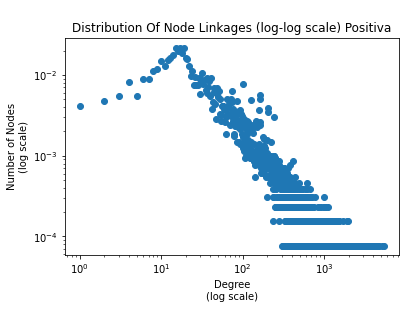

In [14]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale) ' + 'Positiva' )
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")

plt.plot(aux_x, aux_y, 'o')

In [15]:
G = nx.from_pandas_edgelist(neg_edges, 'source', 'target', ['weight'])
data = pos_nodes.set_index('id').to_dict('index').items()

In [16]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35, normalized = False):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    
    keys   = np.asarray([*counter_dict.keys()])
    values = np.asarray([*counter_dict.values()])

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(keys,bins,weights=values)[0] / np.histogram(keys,bins)[0])
    bin_means_x = (np.histogram(keys,bins,weights=keys)[0] / np.histogram(keys,bins)[0])

    if (normalized == True):
        total = 0.
        for i in range(bin_count - 1):
            total += bin_means_y[i]*(bin_means_x[i])
        
        bin_means_y /= total
        
    return bin_means_x, bin_means_y



Creating histogram...


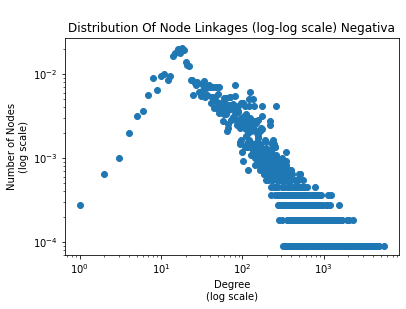

In [17]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale) ' + 'Negativa' )
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")

plt.plot(aux_x, aux_y, 'o')

#### Fit and compute gamma

In [40]:
ba_c2 = dict(collections.Counter(degree_dict.values()))
ba_x,ba_y = log_binning(ba_c2, 20, True)

In [22]:
k_min = 1e1
number_nodes = len(pos_nodes)

indexes_to_keep = [(ba_x >= k_min) & (ba_x <= 1.5e3)]
x = ba_x[tuple(indexes_to_keep)]
y = np.log10(ba_y[tuple(indexes_to_keep)])

gamma_param = np.polyfit(x, y, 1, full = True)
gamma =  gamma_param[0][1]


print("Gamma of the model is: ", gamma, "+-", gamma_param[3][1])
print("Natural cutoff is: ", k_min*(number_nodes**(1./(-gamma-1.)) ) )

Gamma of the model is:  -2.717226347602321 +- 0.6015900944040726
Natural cutoff is:  2481.1762411022546


In [41]:
k_min = 1e1
number_nodes = len(neg_nodes)

indexes_to_keep = [(ba_x >= k_min) & (ba_x <= 1.5e3)]
x = ba_x[tuple(indexes_to_keep)]
y = np.log10(ba_y[tuple(indexes_to_keep)])

gamma_param = np.polyfit(x, y, 1, full = True)
gamma =  gamma_param[0][1]


print("Gamma of the model is: ", gamma, "+-", gamma_param[3][1])
print("Natural cutoff is: ", k_min*(number_nodes**(1./(-gamma-1.)) ) )

Gamma of the model is:  -2.7586223726072228 +- 0.6024077252412645
Natural cutoff is:  1984.75835999194


In [46]:
np.sqrt(0.601590096)

0.7756223926628215

In [47]:
np.sqrt(0.60240775)

0.7761493090894303

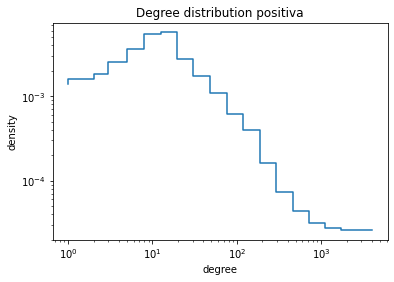

In [23]:
plt.step(ba_x, ba_y)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('density')
plt.yscale('log')
plt.title('Degree distribution '+ 'positiva')
plt.show()

#### page rank score

In [24]:
##page rank according to pos 
pagerank_dict = nx.pagerank(G, alpha=0.9)
nx.set_node_attributes(G, pagerank_dict, 'pagerank')

sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by pagerank:")
for b in sorted_pagerank[:20]:
    print(b, labels_dict.get(b[0]))

Top 20 nodes by pagerank:
(47, 0.007901739675626709) stare
(59, 0.006089963801431534) controllore
(24, 0.005745471537655827) esporre
(82, 0.00544763258828865) anno
(148, 0.005157044944186122) maggior
(67, 0.005140409292332156) autobus
(249, 0.004959951904639205) europeo
(46, 0.004783009466347796) futuro
(149, 0.004633288887263665) ragione
(411, 0.004045973134931014) #aprile
(83, 0.003710286369291097) uomo
(277, 0.003590367705455134) ossessione
(157, 0.003508478700415073) importare
(57, 0.0034765041198639886) bambino
(268, 0.003309971823022397) paris
(280, 0.003259334896294515) tempismo
(84, 0.0032502307265246883) lanciare
(196, 0.0029781610214475547) corriera
(97, 0.0029422285965994303) chiunque
(292, 0.0028144405756304796) guerra


In [25]:
#First get the top 20 nodes by betweenness as a list
top_pagerank = sorted_pagerank[:20]

#Then find and print their degree
for t_pr in top_pagerank: # Loop through top_betweenness
    degree = degree_dict[t_pr[0]] # Use degree_dict to access a node's degree,
#     betweenness_node = betweenness_dict[t_pr[0]]
    print("Name:", labels_dict.get(t_pr[0]), "| Pagerank:", t_pr[1], 
#           "| Betweenness Centrality:", betweenness_node, 
          "| Degree:", degree,  )

Name: stare | Pagerank: 0.007901739675626709 | Degree: 1556
Name: controllore | Pagerank: 0.006089963801431534 | Degree: 175
Name: esporre | Pagerank: 0.005745471537655827 | Degree: 635
Name: anno | Pagerank: 0.00544763258828865 | Degree: 4589
Name: maggior | Pagerank: 0.005157044944186122 | Degree: 613
Name: autobus | Pagerank: 0.005140409292332156 | Degree: 10
Name: europeo | Pagerank: 0.004959951904639205 | Degree: 4771
Name: futuro | Pagerank: 0.004783009466347796 | Degree: 2541
Name: ragione | Pagerank: 0.004633288887263665 | Degree: 1187
Name: #aprile | Pagerank: 0.004045973134931014 | Degree: 763
Name: uomo | Pagerank: 0.003710286369291097 | Degree: 1268
Name: ossessione | Pagerank: 0.003590367705455134 | Degree: 9
Name: importare | Pagerank: 0.003508478700415073 | Degree: 2974
Name: bambino | Pagerank: 0.0034765041198639886 | Degree: 936
Name: paris | Pagerank: 0.003309971823022397 | Degree: 172
Name: tempismo | Pagerank: 0.003259334896294515 | Degree: 0
Name: lanciare | Pagera

# Node Removal

**In this section we try to remove a set of nodes one by one to see how it affects the robustness of the network**

In [18]:
def get_graph_node_removal(list_density_n, list_density_p, node_type, diff_degree = None):
    max_numb_iter = min([len(list_density_n), len(list_density_p)])
    
    os.makedirs('images/', exist_ok = True)

    density_n_arr = np.array(list_density_n)[:max_numb_iter]
    density_p_arr = np.array(list_density_p)[:max_numb_iter]
    
    plt.plot(np.arange(max_numb_iter), density_n_arr, 'b-', label = 'neg')
    plt.plot(np.arange(max_numb_iter), density_p_arr, 'r-', label = 'pos')
    
    plt.title("Node removal by "+str(node_type))
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.legend()
    plt.grid(True)
    plt.savefig('images/NodeRemoval_'+str(node_type)+'.png')
    plt.show()
    
    #diff p-n, usually p is denser than n
    
    diff_array = density_p_arr-density_n_arr
    
    plt.plot(np.arange(max_numb_iter), diff_array, 'k-', label = "by "+ str(node_type))
    if (diff_degree) and (len(diff_degree) >= max_numb_iter):
        plt.plot(np.arange(max_numb_iter), diff_degree[:max_numb_iter], 'k--', label = "by degree")
        
    plt.title("Node removal by "+str(node_type))
    plt.ylabel("den(p) - den(n)")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Diff.png')
    plt.show()
    
    #Relative value wrt initial value that is the max one
    density_n_arr_rel = density_n_arr/density_n_arr[0]
    density_p_arr_rel = density_p_arr/density_p_arr[0]
    plt.plot(np.arange(max_numb_iter), density_n_arr_rel, 'b-', label = 'neg')
    plt.plot(np.arange(max_numb_iter), density_p_arr_rel, 'r-', label = 'pos')
    
    plt.title("Node removal by "+str(node_type))
    plt.ylabel("relative density")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Relative.png')
    plt.show()

    #diff R-L normalized to the first difference, usually R is denser than L
    if (diff_degree):
        diff_first       = diff_degree[0]
    else:
        diff_first       = density_p_arr[0] - density_n_arr[0]
    diff_array_norm  = diff_array/diff_first
    plt.plot(np.arange(max_numb_iter), diff_array_norm, 'k-', label = "by "+ str(node_type))
    if (diff_degree) and (len(diff_degree) >= max_numb_iter):
        diff_degree_norm = np.array(diff_degree)/diff_first
        plt.plot(np.arange(max_numb_iter), diff_degree_norm[:max_numb_iter], 'k--', label = "by degree")
    
    plt.title("Node removal by "+str(node_type))
    plt.ylabel("den(p) - den(n) [normalized]")
    plt.xlabel("Removed nodes")
    plt.grid(True)
    plt.legend()
    plt.savefig('images/NodeRemoval_'+str(node_type)+'_Relative_norm.png')
    plt.show()


In [26]:
# os.makedirs('dataframes_density/', exist_ok = True)

In [19]:
def write_dataframe_np_density_timestep(list_density_n, list_density_p,
                    selected_nodes_n, selected_nodes_p,
                    G_n, G_p, attribute):
    
    init_density_n = list_density_n[0]
    init_density_p = list_density_p[0]
    
    list_density_n = list_density_n[1:]
    list_density_p = list_density_p[1:]
    
    os.makedirs('dataframes_density/', exist_ok = True)
    
    dict_label_n     = nx.get_node_attributes(G_n, 'label' )
    dict_degree_n    = nx.get_node_attributes(G_n, 'degree' )
    dict_attribute_n = nx.get_node_attributes(G_n, str(attribute) )
    
    dict_label_p     = nx.get_node_attributes(G_p, 'label' )
    dict_degree_p    = nx.get_node_attributes(G_p, 'degree' )
    dict_attribute_p = nx.get_node_attributes(G_p, str(attribute) )
    
    timesteps = min([len(list_density_n), len(list_density_p)])
    
    columns   = ['node_n', 'density_n', 'delta_n' , 'degree_n', 'attr_n',
                 'node_p', 'density_p', 'delta_p' , 'degree_p', 'attr_p' ] 
    
    list_label_n     = [dict_label_n.get(i)for i in selected_nodes_n]
    list_degree_n    = [dict_degree_n.get(i)for i in selected_nodes_n]
    list_attribute_n = [dict_attribute_n.get(i)for i in selected_nodes_n]
    
    list_label_p     = [dict_label_p.get(i)for i in selected_nodes_p]
    list_degree_p    = [dict_degree_p.get(i)for i in selected_nodes_p]
    list_attribute_p = [dict_attribute_p.get(i)for i in selected_nodes_p]
    
    delta_n          = [list_density_n[1] - init_density_n]
    delta_p          = [list_density_p[1] - init_density_p]
    
    for i in range(1,timesteps):
        delta_n.append(list_density_n[i]-list_density_n[i-1])
        
    for i in range(1,timesteps):
        delta_p.append(list_density_p[i]-list_density_p[i-1])
    
    df = pd.DataFrame()
    df[columns[0]] = list_label_n[:timesteps]
    df[columns[1]] = list_density_n[:timesteps]
    df[columns[2]] = delta_n[:timesteps]
    df[columns[3]] = list_degree_n[:timesteps]
    df[columns[4]] = list_attribute_n[:timesteps]
    
    df[columns[5]] = list_label_p[:timesteps]
    df[columns[6]] = list_density_p[:timesteps]
    df[columns[7]] = delta_p[:timesteps]
    df[columns[8]] = list_degree_p[:timesteps]
    df[columns[9]] = list_attribute_p[:timesteps]
    
#     df[columns[10]] = list_attribute_p[:timesteps]
#     df[columns[11]] = list_attribute_p[:timesteps]
#     df[columns[12]] = list_attribute_p[:timesteps]
#     df[columns[13]] = list_attribute_p[:timesteps]
#     df[columns[14]] = list_attribute_p[:timesteps]
#     df[columns[15]] = list_attribute_p[:timesteps]
    
    
    
    
    df.to_csv('dataframes_density/'+str(attribute)+'.csv', index = False)
    
    return

###  Adjacency matrix

In [29]:
# neg = pd.read_csv('posts_subsets/EDGES_Neg-comp_adjacent.csv', low_memory=False)
# neg
 ###'posts_subsets/EDGES_Positiva_adjacent.csv']

In [20]:
nodes_df_neg = pd.read_csv('posts_subsets/NODES_prating_LIWC_neg.csv', low_memory=False)
edges_df_neg = pd.read_csv('posts_subsets/EDGES_Neg-comp_adjacent.csv', low_memory=False)
subset_str_n  = 'negativo'
    
nodes_df_pos   = pd.read_csv('posts_subsets/NODES_prating_LIWC_pos.csv', low_memory=False)
edges_df_pos   = pd.read_csv('posts_subsets/EDGES_Positiva_adjacent.csv', low_memory=False)
subset_str_p     = 'positivo'
    
G_n = nx.from_pandas_edgelist(edges_df_neg, 'source', 'target', ['weight'])
G_p = nx.from_pandas_edgelist(edges_df_pos, 'source', 'target', ['weight'])



In [21]:
nodes_df_neg

,id,label,counts,counts_problematico,counts_positivo,counts_negativo,counts_ambiguo,polarity,Emo_Neg,Ansia,Rabbia,Tristez,parolac
0,0,musulmano,15,5,3,6,1,1.000000,0.0,0.0,0.0,0.0,0.0
1,1,pensare,113,7,54,52,0,0.467500,0.0,0.0,0.0,0.0,0.0
2,2,portare,148,17,81,50,0,0.409666,0.0,0.0,0.0,0.0,0.0
3,3,guerra,76,7,32,33,4,-0.409666,0.0,0.0,0.0,0.0,0.0
4,4,santo,18,2,6,10,0,1.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980,10981,quindicenne,1,1,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0
10981,10982,#vigliacco,1,0,0,1,0,-0.915243,0.0,0.0,0.0,0.0,0.0
10982,10983,indugiare,1,0,1,0,0,-1.000000,0.0,0.0,0.0,0.0,0.0
10983,10984,brambilla,1,0,1,0,0,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
nodes_df_neg = pd.read_csv('posts_subsets/NODES_prating_LIWC_neg.csv', low_memory=False)
edges_df_neg = pd.read_csv('posts_subsets/EDGES_Neg-comp_adjacent.csv', low_memory=False)
subset_str_n  = 'negativo'
    
nodes_df_pos   = pd.read_csv('posts_subsets/NODES_prating_LIWC_pos.csv', low_memory=False)
edges_df_pos   = pd.read_csv('posts_subsets/EDGES_Positiva_adjacent.csv', low_memory=False)
subset_str_p     = 'positivo'
    
G_n = nx.from_pandas_edgelist(edges_df_neg, 'source', 'target', ['weight'])
G_p = nx.from_pandas_edgelist(edges_df_pos, 'source', 'target', ['weight'])

#add total negativity
list_tot_neg_n = []
list_tot_neg_p = []
for i in range(len(nodes_df_neg)):
    list_tot_neg_n.append(np.sum(nodes_df_neg.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
for i in range(len(nodes_df_pos)):
    list_tot_neg_p.append(np.sum(nodes_df_pos.loc[i,['Emo_Neg', 'Rabbia', 'Ansia', 'Tristez', 'parolac']]))
nodes_df_neg["Tot_Neg"] = list_tot_neg_n
nodes_df_pos["Tot_Neg"] = list_tot_neg_p    


data_n = nodes_df_neg.set_index('id').to_dict('index').items()
data_p = nodes_df_pos.set_index('id').to_dict('index').items()

G_n.add_nodes_from(data_n)
G_p.add_nodes_from(data_p)

str_title = "adj_network_"


In [23]:
nodes_df_neg.to_csv('posts_subsets/NODES_neg_GEPHI.csv', index = False)
nodes_df_pos.to_csv('posts_subsets/NODES_pos_GEPHI.csv', index = False)

Now executing node removal according to degree...
Removing  0 / 10986
Removing  1000 / 10986
Removing  2000 / 10986
Removing  3000 / 10986
Removing  4000 / 10986
Removing  5000 / 10986
Removing  6000 / 10986
Removing  7000 / 10986
Removing  8000 / 10986
Removing  9000 / 10986
Removing  10000 / 10986
Removing  0 / 11000
Removing  1000 / 11000
Removing  2000 / 11000
Removing  3000 / 11000
Removing  4000 / 11000
Removing  5000 / 11000
Removing  6000 / 11000
Removing  7000 / 11000
Removing  8000 / 11000
Removing  9000 / 11000
Removing  10000 / 11000


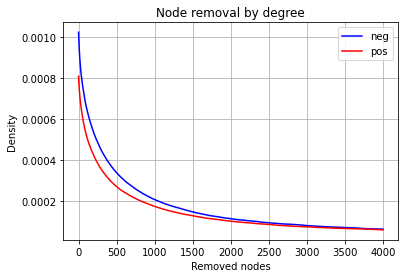

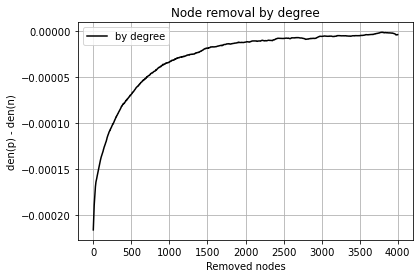

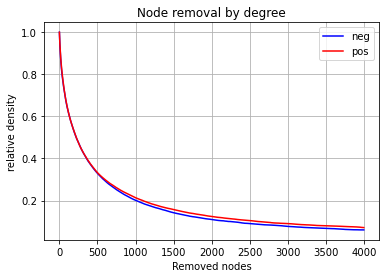

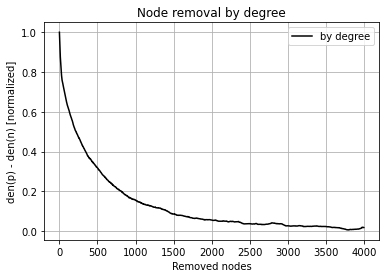

Now executing node removal according to problematic_index...
Removing  0 / 1872
Removing  1000 / 1872
Removing  0 / 370


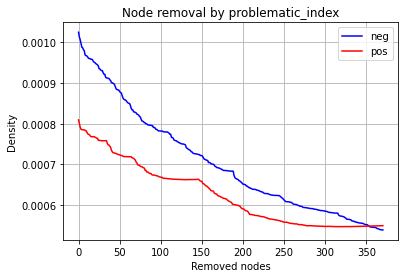

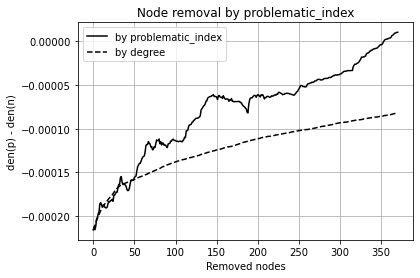

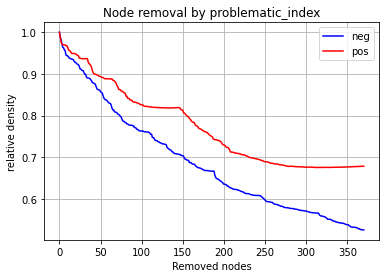

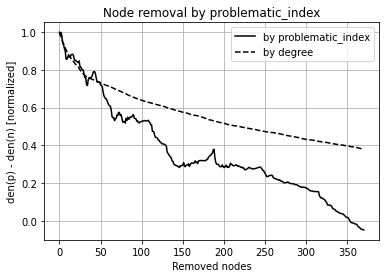

Now executing node removal according to pos_index...
Removing  0 / 8057
Removing  1000 / 8057
Removing  2000 / 8057
Removing  3000 / 8057
Removing  4000 / 8057
Removing  5000 / 8057
Removing  6000 / 8057
Removing  7000 / 8057
Removing  8000 / 8057
Removing  0 / 12486
Removing  1000 / 12486
Removing  2000 / 12486
Removing  3000 / 12486
Removing  4000 / 12486
Removing  5000 / 12486
Removing  6000 / 12486
Removing  7000 / 12486
Removing  8000 / 12486
Removing  9000 / 12486
Removing  10000 / 12486
Removing  11000 / 12486
Removing  12000 / 12486


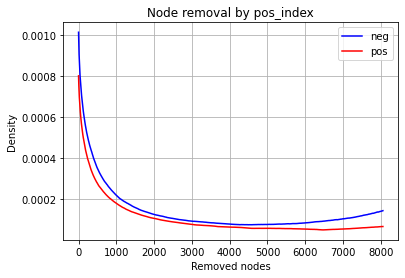

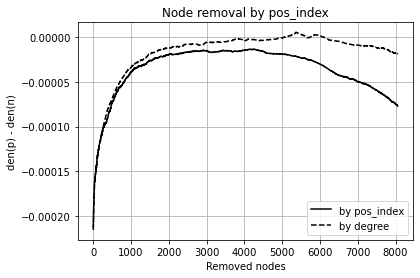

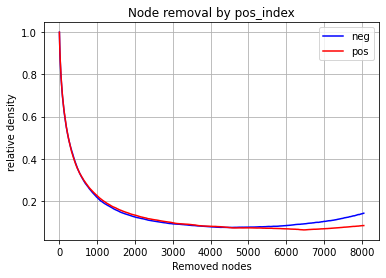

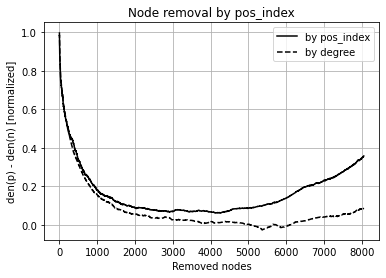

Now executing node removal according to polarity...
Removing  0 / 3956
Removing  1000 / 3956
Removing  2000 / 3956
Removing  3000 / 3956
Removing  0 / 4246
Removing  1000 / 4246
Removing  2000 / 4246
Removing  3000 / 4246
Removing  4000 / 4246


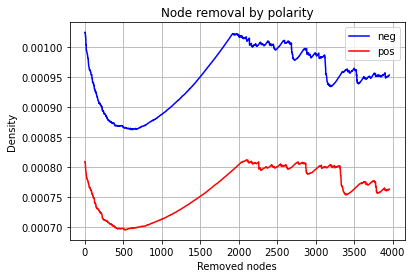

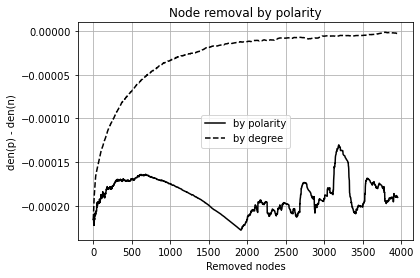

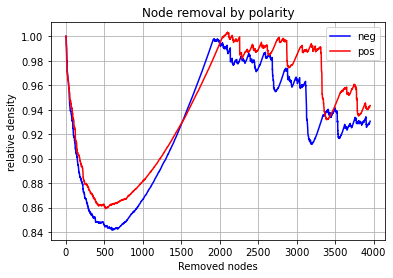

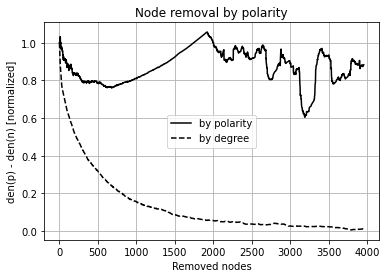

Now executing node removal according to polarity*degree...
Removing  0 / 3956
Removing  1000 / 3956
Removing  2000 / 3956
Removing  3000 / 3956
Removing  0 / 4246
Removing  1000 / 4246
Removing  2000 / 4246
Removing  3000 / 4246
Removing  4000 / 4246


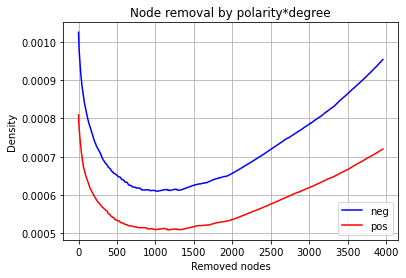

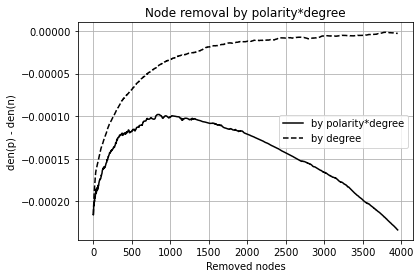

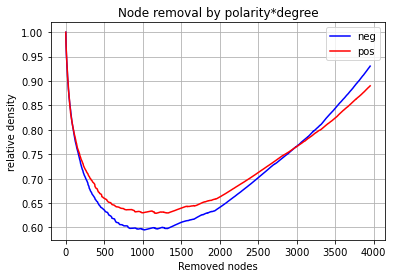

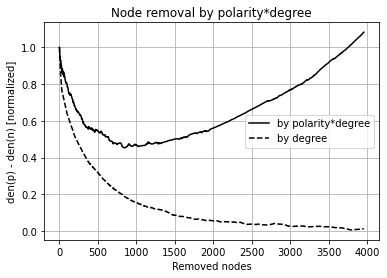

In [27]:
def node_removal_easy(G_n, G_p):
    
    number_removed_degree = 11000 
    
    ##########################
    ###### Using Degree ######
    ##########################

    #Left posts degree
    degree_dict_n = dict(G_n.degree(G_n.nodes()))
    nx.set_node_attributes(G_n, degree_dict_n, 'degree')
    sorted_degree_n = sorted(degree_dict_n.items(), key=itemgetter(1), reverse=True)
    labels_dict_n   = nx.get_node_attributes(G_n,'label')
    prob_index_dict_n = nx.get_node_attributes(G_n,'counts_problematico')
    sorted_prob_index_n = sorted(prob_index_dict_n.items(), key=itemgetter(1), reverse=True)
    prob_polar_dict_n = nx.get_node_attributes(G_n,'polarity')
    sorted_prob_polar_n = sorted(prob_polar_dict_n.items(), key=itemgetter(1), reverse=False)
    
        
    #Right posts degree
    degree_dict_p = dict(G_p.degree(G_p.nodes()))
    nx.set_node_attributes(G_p, degree_dict_p, 'degree')
    sorted_degree_p = sorted(degree_dict_p.items(), key=itemgetter(1), reverse=True)
    labels_dict_p   = nx.get_node_attributes(G_p,'label')
    prob_index_dict_p = nx.get_node_attributes(G_p,'counts_problematico')
    sorted_prob_index_p = sorted(prob_index_dict_p.items(), key=itemgetter(1), reverse=True)
    prob_polar_dict_p = nx.get_node_attributes(G_p,'polarity')
    sorted_prob_polar_p = sorted(prob_polar_dict_p.items(), key=itemgetter(1), reverse=False)
    
    print("Now executing node removal according to degree...")

    #Here we select the nodes and sort them by degree
    selected_nodes_n = list(sorted_degree_n)[:number_removed_degree]
    nodes_removed_n = []
    for i,v in enumerate(selected_nodes_n): 
        nodes_removed_n.append(selected_nodes_n[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_n           = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n    = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n)) #returns an error 
        nodes_rem_n.append(i+1)
    
    #Here we select the nodes and sort them by degree
    selected_nodes_p = list(sorted_degree_p)[:number_removed_degree]
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_p           = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p    = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p)) #returns an error 
        nodes_rem_p.append(i+1)
        
    get_graph_node_removal(list_density_n[:4000], list_density_p[:4000], 'degree')
    
    list_diff_degree = [x-y for x,y in zip(list_density_p, list_density_n)]
    
    ############################
    ###### Using prob index ####
    ############################
    
#     print("Now executing node removal according to hate_index...")
    
#     selected_nodes_L = [x for x in sorted_hate_index_L if x[1] > 0 ]
#     nodes_removed_L  = []
#     for i,v in enumerate(selected_nodes_L): 
#         nodes_removed_L.append(selected_nodes_L[i][0])

#     #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
#     G1_L = G_L.copy()
#     list_density_L = [nx.density(G1_L)]
#     nodes_rem_L = []
#     for i, node in enumerate(nodes_removed_L):
#         if (i % 1000 == 0):
#             print("Removing ", i ,"/", len(nodes_removed_L))
#         G1_L.remove_node(node)
#         list_density_L.append(nx.density(G1_L))
#         nodes_rem_L.append(i+1)

#     #Using hate index
#     selected_nodes_R = [x for x in sorted_hate_index_R if x[1] > 0 ]
#     nodes_removed_R = []
#     for i,v in enumerate(selected_nodes_R): 
#         nodes_removed_R.append(selected_nodes_R[i][0])

#     #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
#     G1_R = G_R.copy()
#     list_density_R = [nx.density(G1_R)]
#     nodes_rem_R = []
#     for i, node in enumerate(nodes_removed_R):
#         if (i % 1000 == 0):
#             print("Removing ", i ,"/", len(nodes_removed_R))
#         G1_R.remove_node(node)
#         list_density_R.append(nx.density(G1_R))
#         nodes_rem_R.append(i+1)
    
#     write_dataframe_LR_density_timestep(list_density_L, list_density_R,
#                                         nodes_removed_L, nodes_removed_R,
#                                         G_L, G_R,
#                                         'counts_hate')
    
#     get_graph_node_removal(list_density_L, list_density_R, 'hate_index', list_diff_degree)

    
    #####################################
    ###### Using problematic_index ######
    #####################################
    
    prob_index_dict_n = nx.get_node_attributes(G_n,'counts_problematico')
    sorted_prob_index_n = sorted(prob_index_dict_n.items(), key=itemgetter(1), reverse=True)
    prob_index_dict_p = nx.get_node_attributes(G_p,'counts_problematico')
    sorted_prob_index_p = sorted(prob_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    print("Now executing node removal according to problematic_index...")
    
    selected_nodes_n = [x for x in sorted_prob_index_n if x[1] > 0 ]
    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n): 
        nodes_removed_n.append(selected_nodes_n[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)

    #Using hate index
    selected_nodes_p = [x for x in sorted_prob_index_p if x[1] > 0 ]
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        nodes_removed_n, nodes_removed_p,
                                        G_n, G_p,
                                        'counts_problematico')
    
    get_graph_node_removal(list_density_n, list_density_p, 'problematic_index', list_diff_degree)
    
     ############################
    ###### Using pos index ####
    ############################
    
    pos_index_dict_n = nx.get_node_attributes(G_n,'counts_positivo')
    sorted_pos_index_n = sorted(pos_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    pos_index_dict_p = nx.get_node_attributes(G_p,'counts_positivo')
    sorted_pos_index_p = sorted(pos_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    print("Now executing node removal according to pos_index...")
    
    selected_nodes_n = [x for x in sorted_pos_index_n if x[1] > 0 ]
    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n): 
        nodes_removed_n.append(selected_nodes_n[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest pos_index
    G1_n = G_n.copy()
    list_density_n = []
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)

    #Using pos index
    selected_nodes_p = [x for x in sorted_pos_index_p if x[1] > 0 ]
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest pos_index
    G1_p = G_p.copy()
    list_density_p = []
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        nodes_removed_n, nodes_removed_p,
                                        G_n, G_p,
                                        'counts_positivo')
    
    get_graph_node_removal(list_density_n, list_density_p, 'pos_index', list_diff_degree)





    
    ############################
    ###### Using polarity ######
    ############################
    
    print("Now executing node removal according to polarity...")

    selected_nodes_n = [x for x in sorted_prob_polar_n if x[1] < 0 ]
    
#     selected_nodes_middle_L = [x for x in sorted_hate_polar_L if x[1] < 0 and x[1] > -1 ]
#     selected_nodes_least_L  = [x for x in sorted_hate_polar_L if x[1] == -1 ]
# #     selected_nodes_least_L = random.sample(selected_nodes_least_L, len(selected_nodes_least_L))
#     selected_nodes_L = selected_nodes_least_L + selected_nodes_middle_L

    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)

    selected_nodes_p = [x for x in sorted_prob_polar_p if x[1] < 0 ]
    
#     selected_nodes_middle_R = [x for x in sorted_hate_polar_R if x[1] < 0 and x[1] > -1 ]
#     selected_nodes_least_R  = [x for x in sorted_hate_polar_R if x[1] == -1 ]
# #     selected_nodes_least_R = random.sample(selected_nodes_least_R, len(selected_nodes_least_R))
#     selected_nodes_R = selected_nodes_least_R + selected_nodes_middle_R
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        nodes_removed_n, nodes_removed_p,
                                        G_n, G_p,
                                        'polarity')
    
    get_graph_node_removal(list_density_n, list_density_p, 'polarity', list_diff_degree)
    
    ###################################
    ###### Using polarity*degree ######
    ###################################
    
    print("Now executing node removal according to polarity*degree...")
    
    pol_degree_nodes_n        = [(x[0],x[1]*degree_dict_n.get(x[0])) for x in sorted_prob_polar_n if x[1] < 0 ]
    pol_degree_nodes_sorted_n = sorted(pol_degree_nodes_n, key=lambda tup: tup[1], reverse = False)
    selected_nodes_n = list(pol_degree_nodes_sorted_n) 
    nodes_removed_n = []
    for i,v in enumerate(selected_nodes_n): 
        nodes_removed_n.append(selected_nodes_n[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)

        
    pol_degree_nodes_p        = [(x[0],x[1]*degree_dict_p.get(x[0])) for x in sorted_prob_polar_p if x[1] < 0 ]
    pol_degree_nodes_sorted_p = sorted(pol_degree_nodes_p, key=lambda tup: tup[1], reverse = False)
    selected_nodes_p = list(pol_degree_nodes_sorted_p) 
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
           
    get_graph_node_removal(list_density_n, list_density_p, 'polarity*degree', list_diff_degree)
    
    return list_diff_degree
    
degree_diff_list = node_removal_easy(G_n, G_p)


Now executing node removal according to Emo_Neg...
Removing  0 / 356
Removing  0 / 302


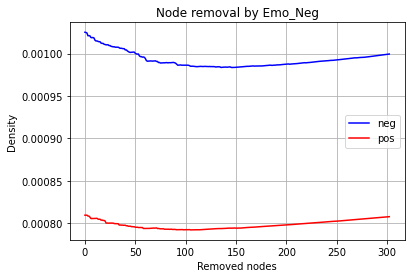

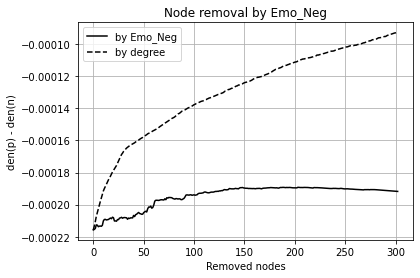

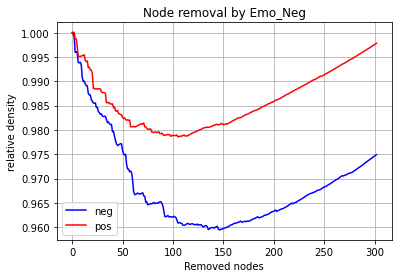

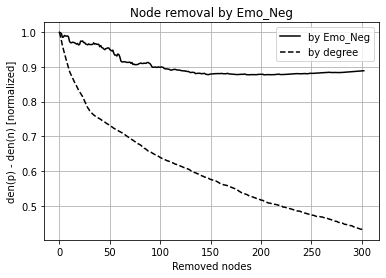

Now executing node removal according to Ansia...
Removing  0 / 57
Removing  0 / 50


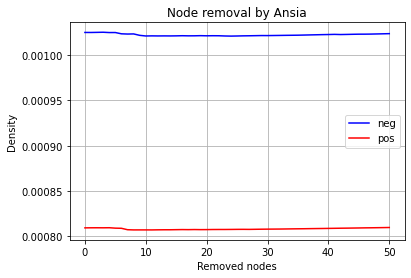

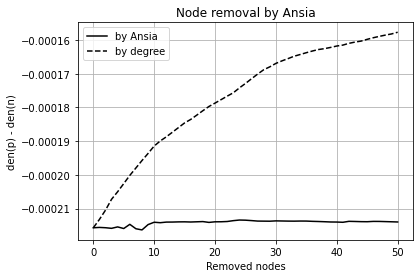

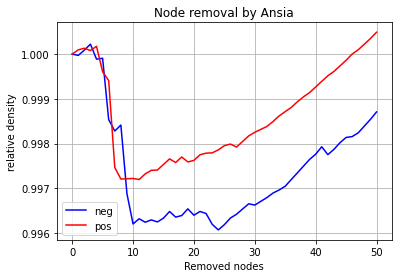

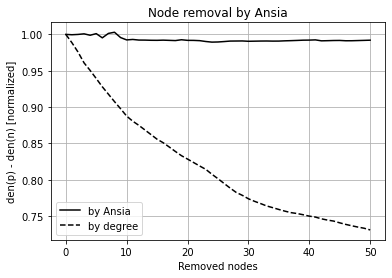

Now executing node removal according to Rabbia...
Removing  0 / 159
Removing  0 / 115


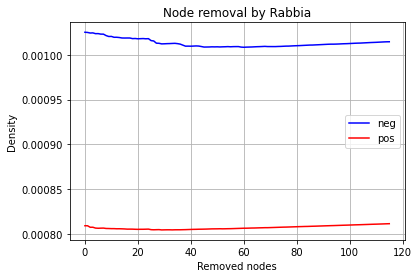

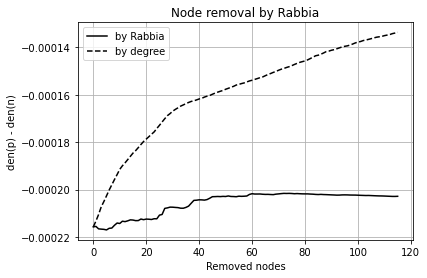

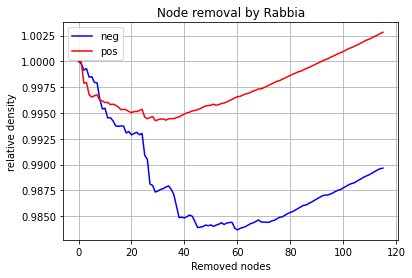

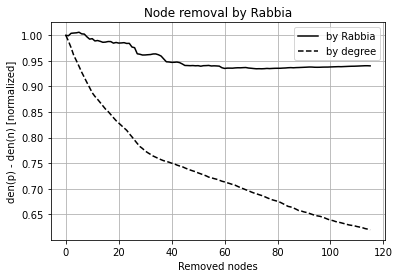

Now executing node removal according to Tristez...
Removing  0 / 73
Removing  0 / 70


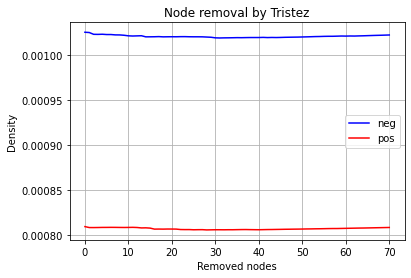

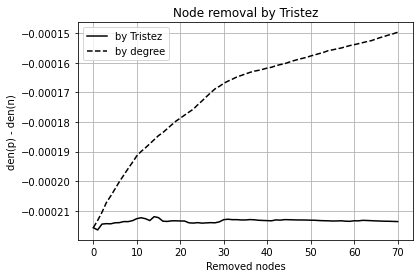

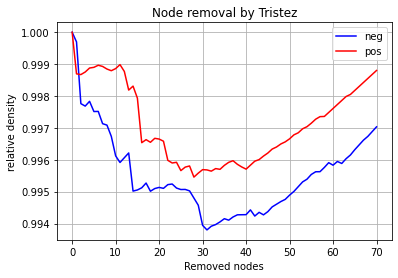

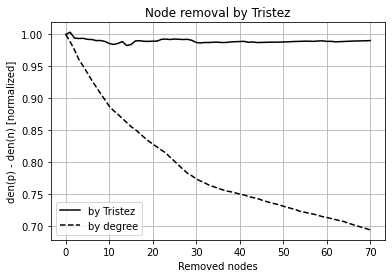

Now executing node removal according to parolac...
Removing  0 / 15
Removing  0 / 7


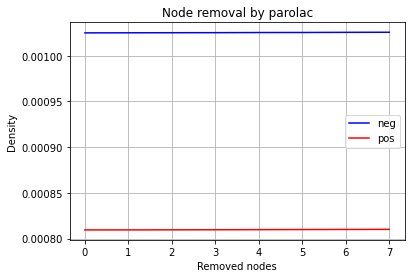

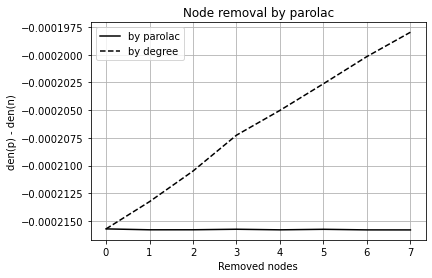

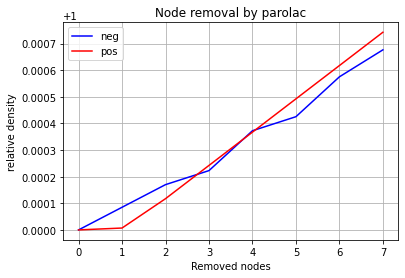

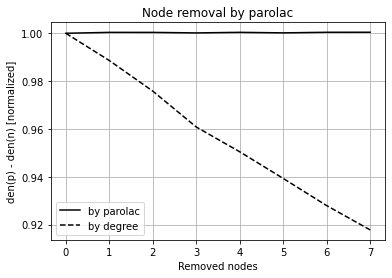

In [28]:
def node_removal_LIWC(G_n, G_p, degree_diff_list = None, degree_order = True):
    
    #Left posts degree
    dict_degree_n = dict(G_n.degree(G_n.nodes()))
    nx.set_node_attributes(G_n, dict_degree_n, 'degree')
    sorted_degree_n = sorted(dict_degree_n.items(), key=itemgetter(1), reverse=True)
    dict_label_n  = nx.get_node_attributes(G_n,'label')
    
    #Right posts degree
    dict_degree_p = dict(G_p.degree(G_p.nodes()))
    nx.set_node_attributes(G_p, dict_degree_p, 'degree')
    sorted_degree_p = sorted(dict_degree_p.items(), key=itemgetter(1), reverse=True)
    dict_label_p   = nx.get_node_attributes(G_p,'label')

    ##########################
    ###### Using Emo_Neg #####
    ##########################
    
    print("Now executing node removal according to Emo_Neg...")
    
    #LEFT SUBSET
    Emo_Neg_index_dict_n   = nx.get_node_attributes(G_n,'Emo_Neg')
    sorted_Emo_Neg_index_n = sorted(Emo_Neg_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    selected_Emo_Neg_n      = [x[0] for x in sorted_Emo_Neg_index_n if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_n = {x:dict_degree_n[x] for x in dict_degree_n if x in selected_Emo_Neg_n}
        sorted_degree_n = sorted(survivors_degree_n.items(), key=itemgetter(1), reverse=True)
        selected_Emo_Neg_n      = [x[0] for x in sorted_Emo_Neg_index_n if x[1] == 100.0]
    else:
        selected_Emo_Neg_n  = random.sample(selected_Emo_Neg_n, len(selected_Emo_Neg_n))
    selected_nodes_n = selected_Emo_Neg_n.copy()

    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)
    
    #RIGHT SUBSET
    Emo_Neg_index_dict_p   = nx.get_node_attributes(G_p,'Emo_Neg')
    sorted_Emo_Neg_index_p = sorted(Emo_Neg_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    selected_Emo_Neg_p      = [x[0] for x in sorted_Emo_Neg_index_p if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_p = {x:dict_degree_p[x] for x in dict_degree_p if x in selected_Emo_Neg_p}
        sorted_degree_p = sorted(survivors_degree_p.items(), key=itemgetter(1), reverse=True)
        selected_Emo_Neg_p      = [x[0] for x in sorted_Emo_Neg_index_p if x[1] == 100.0]
    else:
        selected_Emo_Neg_p  = random.sample(selected_Emo_Neg_p, len(selected_Emo_Neg_p))
    selected_nodes_p = selected_Emo_Neg_p.copy()
    
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p,
                                        'Emo_Neg')
    
    get_graph_node_removal(list_density_n, list_density_p, 'Emo_Neg',degree_diff_list)
    
    ##########################
    ###### Using Ansia #######
    ##########################
    
    print("Now executing node removal according to Ansia...")
    
    #LEFT SUBSET
    Ansia_index_dict_n   = nx.get_node_attributes(G_n,'Ansia')
    sorted_Ansia_index_n = sorted(Ansia_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    selected_Ansia_n      = [x[0] for x in sorted_Ansia_index_n if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_n = {x:dict_degree_n[x] for x in dict_degree_n if x in selected_Ansia_n}
        sorted_degree_n = sorted(survivors_degree_n.items(), key=itemgetter(1), reverse=True)
        selected_Ansia_n      = [x[0] for x in sorted_Ansia_index_n if x[1] == 100.0]
    else:
        selected_Ansia_n  = random.sample(selected_Ansia_n, len(selected_Ansia_n))
        
    selected_nodes_n  = selected_Ansia_n.copy()
    nodes_removed_n   = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)
    
    #RIGHT SUBSET
    Ansia_index_dict_p   = nx.get_node_attributes(G_p,'Ansia')
    sorted_Ansia_index_p = sorted(Ansia_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    selected_Ansia_p      = [x[0] for x in sorted_Ansia_index_p if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_p = {x:dict_degree_p[x] for x in dict_degree_p if x in selected_Ansia_p}
        sorted_degree_p = sorted(survivors_degree_p.items(), key=itemgetter(1), reverse=True)
        selected_Ansia_p      = [x[0] for x in sorted_Ansia_index_p if x[1] == 100.0]
    else:
        selected_Ansia_p  = random.sample(selected_Ansia_p, len(selected_Ansia_p))
    selected_nodes_p  = selected_Ansia_p.copy()
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p,
                                        'Ansia')
    get_graph_node_removal(list_density_n, list_density_p, 'Ansia',degree_diff_list)
    
    
    ###########################
    ###### Using Rabbia #######
    ###########################
    
    print("Now executing node removal according to Rabbia...")
    
    #LEFT SUBSET
    Rabbia_index_dict_n   = nx.get_node_attributes(G_n,'Rabbia')
    sorted_Rabbia_index_n = sorted(Rabbia_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    selected_Rabbia_n      = [x[0] for x in sorted_Rabbia_index_n if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_n = {x:dict_degree_n[x] for x in dict_degree_n if x in selected_Rabbia_n}
        sorted_degree_n = sorted(survivors_degree_n.items(), key=itemgetter(1), reverse=True)
        selected_Rabbia_n      = [x[0] for x in sorted_Rabbia_index_n if x[1] == 100.0]
    else:
        selected_Rabbia_n  = random.sample(selected_Rabbia_n, len(selected_Rabbia_n))
    selected_nodes_n  = selected_Rabbia_n.copy()

    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)
    
    #RIGHT SUBSET
    Rabbia_index_dict_p   = nx.get_node_attributes(G_p,'Rabbia')
    sorted_Rabbia_index_p = sorted(Rabbia_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    selected_Rabbia_p      = [x[0] for x in sorted_Rabbia_index_p if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_p = {x:dict_degree_p[x] for x in dict_degree_p if x in selected_Rabbia_p}
        sorted_degree_p = sorted(survivors_degree_p.items(), key=itemgetter(1), reverse=True)
        selected_Rabbia_p      = [x[0] for x in sorted_Rabbia_index_p if x[1] == 100.0]
    else:
        selected_Rabbia_p  = random.sample(selected_Rabbia_p, len(selected_Rabbia_p))
    selected_nodes_p  = selected_Rabbia_p.copy()
    
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p,
                                        'Rabbia')
    
    get_graph_node_removal(list_density_n, list_density_p, 'Rabbia', degree_diff_list)
    
    
    ############################
    ###### Using Tristez #######
    ############################
    
    print("Now executing node removal according to Tristez...")
        #LEFT SUBSET
    Tristez_index_dict_n   = nx.get_node_attributes(G_n,'Tristez')
    sorted_Tristez_index_n = sorted(Tristez_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    selected_Tristez_n      = [x[0] for x in sorted_Tristez_index_n if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_n = {x:dict_degree_n[x] for x in dict_degree_n if x in selected_Tristez_n}
        sorted_degree_n = sorted(survivors_degree_n.items(), key=itemgetter(1), reverse=True)
        selected_Tristez_n      = [x[0] for x in sorted_Tristez_index_n if x[1] == 100.0]
    else:
        selected_Tristez_n  = random.sample(selected_Tristez_n, len(selected_Tristez_n))
    selected_nodes_n = selected_Tristez_n.copy()

    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)
    
    #RIGHT SUBSET
    Tristez_index_dict_p   = nx.get_node_attributes(G_p,'Tristez')
    sorted_Tristez_index_p = sorted(Tristez_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    selected_Tristez_p      = [x[0] for x in sorted_Tristez_index_p if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_p = {x:dict_degree_p[x] for x in dict_degree_p if x in selected_Tristez_p}
        sorted_degree_p = sorted(survivors_degree_p.items(), key=itemgetter(1), reverse=True)
        selected_Tristez_p      = [x[0] for x in sorted_Tristez_index_p if x[1] == 100.0]
    else:
        selected_Tristez_p  = random.sample(selected_Tristez_p, len(selected_Tristez_p))
    selected_nodes_p = selected_Tristez_p.copy()
    
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p, 
                                        'Tristez')
        
    get_graph_node_removal(list_density_n, list_density_p, 'Tristez', degree_diff_list)
    
    ############################
    ###### Using parolac #######
    ############################
    
    print("Now executing node removal according to parolac...")
    
    #LEFT SUBSET
    parolac_index_dict_n   = nx.get_node_attributes(G_n,'parolac')
    sorted_parolac_index_n = sorted(parolac_index_dict_n.items(), key=itemgetter(1), reverse=True)
    
    selected_parolac_n      = [x[0] for x in sorted_parolac_index_n if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_n = {x:dict_degree_n[x] for x in dict_degree_n if x in selected_parolac_n}
        sorted_degree_n = sorted(survivors_degree_n.items(), key=itemgetter(1), reverse=True)
        selected_parolac_n      = [x[0] for x in sorted_parolac_index_n if x[1] == 100.0]
    else:
        selected_parolac_n  = random.sample(selected_parolac_n, len(selected_parolac_n))
    selected_nodes_n = selected_parolac_n.copy()

    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n):
        nodes_removed_n.append(selected_nodes_n[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_n = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n))
        nodes_rem_n.append(i+1)
    
    #RIGHT SUBSET
    parolac_index_dict_p   = nx.get_node_attributes(G_p,'parolac')
    sorted_parolac_index_p = sorted(parolac_index_dict_p.items(), key=itemgetter(1), reverse=True)
    
    selected_parolac_p      = [x[0] for x in sorted_parolac_index_p if x[1] == 100.0]
    if (degree_order) == True: 
        survivors_degree_p = {x:dict_degree_p[x] for x in dict_degree_p if x in selected_parolac_p}
        sorted_degree_p = sorted(survivors_degree_p.items(), key=itemgetter(1), reverse=True)
        selected_parolac_p      = [x[0] for x in sorted_parolac_index_p if x[1] == 100.0]
    else:
        selected_parolac_p  = random.sample(selected_parolac_p, len(selected_parolac_p))
    selected_nodes_p = selected_parolac_p.copy()
    
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_p = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p))
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p, 
                                        'parolac')
    get_graph_node_removal(list_density_n, list_density_p, 'parolac', degree_diff_list)

node_removal_LIWC(G_n, G_p, degree_diff_list)

Now executing node removal according to Total Negativity...
Removing  0 / 365
Removing  0 / 303


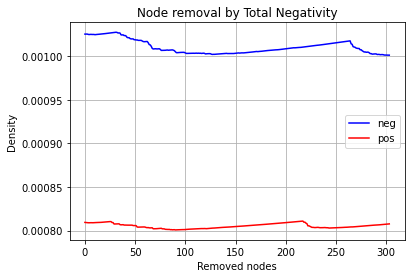

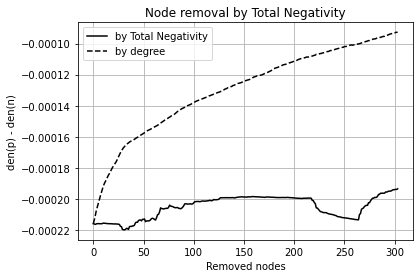

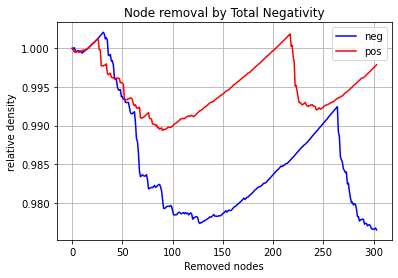

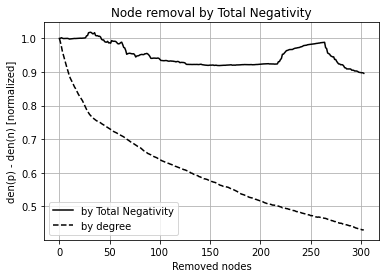

In [30]:
def node_total_negativity(G_n, G_p, degree_diff_list = None):
    
    ###########################
    ###### Using Tot_Neg ######
    ###########################
    
    
    #Left posts degree
    degree_dict_n = dict(G_n.degree(G_n.nodes()))
    nx.set_node_attributes(G_n, degree_dict_n, 'degree')
    sorted_degree_n = sorted(degree_dict_n.items(), key=itemgetter(1), reverse=True)
    tot_neg_dict_n   = nx.get_node_attributes(G_n,'Tot_Neg')
    sorted_tot_neg_n = sorted(tot_neg_dict_n.items(), key=itemgetter(1), reverse=True)
    dict_label_n = nx.get_node_attributes(G_n,'label')
    
    #Right posts degree
    degree_dict_p = dict(G_p.degree(G_p.nodes()))
    nx.set_node_attributes(G_p, degree_dict_p, 'degree')
    sorted_degree_p = sorted(degree_dict_p.items(), key=itemgetter(1), reverse=True)
    tot_neg_dict_p   = nx.get_node_attributes(G_p,'Tot_Neg')
    sorted_tot_neg_p = sorted(tot_neg_dict_p.items(), key=itemgetter(1), reverse=True)
    dict_label_p = nx.get_node_attributes(G_p,'label')
    
    print("Now executing node removal according to Total Negativity...")

    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_n = [x[0] for x in sorted_tot_neg_n if x[1] != 0.0]
    nodes_removed_n  = []
    for i,v in enumerate(selected_nodes_n): 
        nodes_removed_n.append(selected_nodes_n[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_n           = G_n.copy()
    list_density_n = [nx.density(G1_n)]
    nodes_rem_n    = []
    for i, node in enumerate(nodes_removed_n):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_n))
        G1_n.remove_node(node)
        list_density_n.append(nx.density(G1_n)) #returns an error 
        nodes_rem_n.append(i+1)
    
    #Here we select the nodes and sort them by totalnegativity
    selected_nodes_p = [x[0] for x in sorted_tot_neg_p if x[1] != 0.0]
    nodes_removed_p = []
    for i,v in enumerate(selected_nodes_p): 
        nodes_removed_p.append(selected_nodes_p[i])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_p           = G_p.copy()
    list_density_p = [nx.density(G1_p)]
    nodes_rem_p    = []
    for i, node in enumerate(nodes_removed_p):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_p))
        G1_p.remove_node(node)
        list_density_p.append(nx.density(G1_p)) #returns an error 
        nodes_rem_p.append(i+1)
    
    write_dataframe_np_density_timestep(list_density_n, list_density_p,
                                        selected_nodes_n, selected_nodes_p,
                                        G_n, G_p,
                                        'Tot_Neg')
    
    get_graph_node_removal(list_density_n, list_density_p, 'Total Negativity', degree_diff_list)

node_total_negativity(G_n, G_p, degree_diff_list)

In [33]:
##neg campaign  problematic_index
degree_dict_n = dict(G_n.degree(G_n.nodes()))
labels_dict   = nx.get_node_attributes(G_n,'label')

prob_index_dict = nx.get_node_attributes(G_n,'counts_problematico')
sorted_prob_index = sorted(prob_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by problematic_index in Negative graph:")
for i, d in enumerate(sorted_prob_index[:20]):
    print(i,"-th node", d, labels_dict.get(d[0]), "  degree  ->", degree_dict_n.get(d[0]))

Top 20 nodes by problematic_index in Negative graph:
0 -th node (47, 63) italia   degree  -> 733
1 -th node (97, 46) sinistro   degree  -> 387
2 -th node (24, 44) europa   degree  -> 575
3 -th node (46, 43) italiano   degree  -> 577
4 -th node (151, 42) clandestino   degree  -> 100
5 -th node (324, 36) maggio   degree  -> 293
6 -th node (86, 34) #europee   degree  -> 192
7 -th node (67, 32) salvini   degree  -> 640
8 -th node (13, 31) immigrazione   degree  -> 90
9 -th node (318, 31) centro   degree  -> 64
10 -th node (319, 29) sociale   degree  -> 154
11 -th node (18, 28) difendere   degree  -> 211
12 -th node (14, 28) islamico   degree  -> 70
13 -th node (92, 28) #votalega   degree  -> 21
14 -th node (371, 26) porto   degree  -> 121
15 -th node (93, 26) #scrivisardone   degree  -> 1
16 -th node (944, 25) accoglienza   degree  -> 102
17 -th node (5, 24) casa   degree  -> 264
18 -th node (61, 23) sicurezza   degree  -> 140
19 -th node (742, 23) immigrato   degree  -> 72


In [34]:
#pos campaign problematic
degree_dict_p = dict(G_p.degree(G_p.nodes()))
labels_dict   = nx.get_node_attributes(G_p,'label')
prob_index_dict = nx.get_node_attributes(G_p,'counts_problematico')
sorted_prob_index = sorted(prob_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by problematic_index in Positive graph:")
for i, d in enumerate(sorted_prob_index[:20]):
    print(i,"-th node", d, labels_dict.get(d[0]), "  degree  ->", degree_dict_p.get(d[0]))


Top 20 nodes by problematic_index in Positive graph:
0 -th node (354, 13) italia   degree  -> 726
1 -th node (371, 13) europa   degree  -> 807
2 -th node (282, 11) italiano   degree  -> 457
3 -th node (4264, 11) immigrazione   degree  -> 67
4 -th node (4256, 8) clandestino   degree  -> 24
5 -th node (66, 7) bloccare   degree  -> 37
6 -th node (3295, 7) confino   degree  -> 36
7 -th node (780, 6) sicurezza   degree  -> 136
8 -th node (4299, 6) #scrivisantanche   degree  -> 19
9 -th node (1936, 5) legare   degree  -> 278
10 -th node (71, 5) maggio   degree  -> 414
11 -th node (2880, 5) salvini   degree  -> 114
12 -th node (618, 5) settimana   degree  -> 89
13 -th node (1014, 5) governare   degree  -> 225
14 -th node (283, 5) difendere   degree  -> 217
15 -th node (480, 5) islamico   degree  -> 16
16 -th node (4806, 5) sbarco   degree  -> 23
17 -th node (5082, 5) mangiatoia   degree  -> 8
18 -th node (5139, 5) ungheria   degree  -> 15
19 -th node (206, 4) porto   degree  -> 123
